In [340]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [341]:
x_in = torch.arange(0,1,0.005)
x_in

tensor([0.0000, 0.0050, 0.0100, 0.0150, 0.0200, 0.0250, 0.0300, 0.0350, 0.0400,
        0.0450, 0.0500, 0.0550, 0.0600, 0.0650, 0.0700, 0.0750, 0.0800, 0.0850,
        0.0900, 0.0950, 0.1000, 0.1050, 0.1100, 0.1150, 0.1200, 0.1250, 0.1300,
        0.1350, 0.1400, 0.1450, 0.1500, 0.1550, 0.1600, 0.1650, 0.1700, 0.1750,
        0.1800, 0.1850, 0.1900, 0.1950, 0.2000, 0.2050, 0.2100, 0.2150, 0.2200,
        0.2250, 0.2300, 0.2350, 0.2400, 0.2450, 0.2500, 0.2550, 0.2600, 0.2650,
        0.2700, 0.2750, 0.2800, 0.2850, 0.2900, 0.2950, 0.3000, 0.3050, 0.3100,
        0.3150, 0.3200, 0.3250, 0.3300, 0.3350, 0.3400, 0.3450, 0.3500, 0.3550,
        0.3600, 0.3650, 0.3700, 0.3750, 0.3800, 0.3850, 0.3900, 0.3950, 0.4000,
        0.4050, 0.4100, 0.4150, 0.4200, 0.4250, 0.4300, 0.4350, 0.4400, 0.4450,
        0.4500, 0.4550, 0.4600, 0.4650, 0.4700, 0.4750, 0.4800, 0.4850, 0.4900,
        0.4950, 0.5000, 0.5050, 0.5100, 0.5150, 0.5200, 0.5250, 0.5300, 0.5350,
        0.5400, 0.5450, 0.5500, 0.5550, 

In [342]:
y = torch.cos(x_in*4)
y

tensor([ 1.0000,  0.9998,  0.9992,  0.9982,  0.9968,  0.9950,  0.9928,  0.9902,
         0.9872,  0.9838,  0.9801,  0.9759,  0.9713,  0.9664,  0.9611,  0.9553,
         0.9492,  0.9428,  0.9359,  0.9287,  0.9211,  0.9131,  0.9048,  0.8961,
         0.8870,  0.8776,  0.8678,  0.8577,  0.8473,  0.8365,  0.8253,  0.8139,
         0.8021,  0.7900,  0.7776,  0.7648,  0.7518,  0.7385,  0.7248,  0.7109,
         0.6967,  0.6822,  0.6675,  0.6524,  0.6372,  0.6216,  0.6058,  0.5898,
         0.5735,  0.5570,  0.5403,  0.5234,  0.5062,  0.4889,  0.4713,  0.4536,
         0.4357,  0.4176,  0.3993,  0.3809,  0.3624,  0.3436,  0.3248,  0.3058,
         0.2867,  0.2675,  0.2482,  0.2288,  0.2092,  0.1896,  0.1700,  0.1502,
         0.1304,  0.1106,  0.0907,  0.0707,  0.0508,  0.0308,  0.0108, -0.0092,
        -0.0292, -0.0492, -0.0691, -0.0891, -0.1090, -0.1288, -0.1487, -0.1684,
        -0.1881, -0.2077, -0.2272, -0.2466, -0.2660, -0.2852, -0.3043, -0.3233,
        -0.3421, -0.3609, -0.3795, -0.39

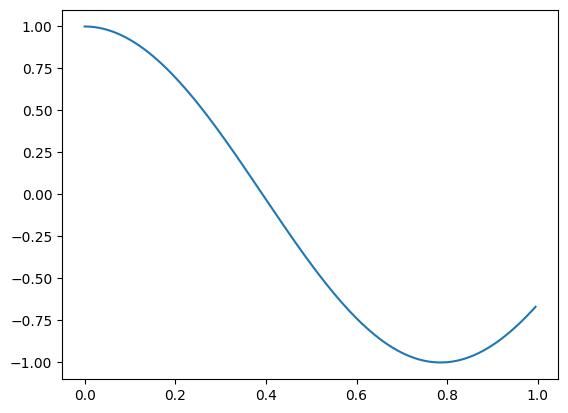

In [343]:
plt.plot(x_in,y)

In [344]:
def create_polinomial_feature_vector_for_given_x(v,nx):
  xvals = torch.zeros((nx,),dtype=torch.float32)
  for i in range(0,nx):
    xvals[i] = v**i

  return xvals


In [345]:
create_polinomial_feature_vector_for_given_x(1.0001,15)

tensor([1.0000, 1.0001, 1.0002, 1.0003, 1.0004, 1.0005, 1.0006, 1.0007, 1.0008,
        1.0009, 1.0010, 1.0011, 1.0012, 1.0013, 1.0014])

In [346]:
num_features = 15
num_samples = len(x_in)
X = torch.zeros((num_samples,num_features))
print(f"X Shape:{X.shape}")

for i in range(0,num_samples):
  x_ = create_polinomial_feature_vector_for_given_x(x_in[i],num_features)
  X[i] = x_





X Shape:torch.Size([200, 15])


In [347]:
import torch.nn as nn
import torch.optim as optim

In [348]:
class LinearRegressionCos(torch.nn.Module):
  def __init__(self,input_dim):
    super(LinearRegressionCos,self).__init__()
    self.weights = nn.Parameter(torch.randn(input_dim,1,requires_grad=True))

    # if you initialize with only input dim then it use same value for output dim
    self.bias = nn.Parameter(torch.randn(1,requires_grad=True))

  def forward(self,x):
    # print(f"X shape:{x.shape}")
    # print(f"self.weights shape:{self.weights.shape}")
    return torch.matmul(x,self.weights) + self.bias



In [349]:
model = LinearRegressionCos(num_features)
loss_func = nn.MSELoss()

learning_rate=0.01

# 1st try with SGD optimizer and then try with adam
optimizer = optim.Adam(model.parameters(),lr=learning_rate)

EPOCHS = 4000
print(f"y shape: {y.shape}")
y_true = y.reshape(-1,1)
print(f"X shape: {X.shape}")
print(f"y shape: {y_true.shape}")
J_history=[]
for epoch in range(EPOCHS):

  y_pred = model(X)
  #print(y_pred)
  # print("y_pred:",y_pred.shape)

  loss = loss_func(y_pred,y_true)

  loss.backward()

  optimizer.step()

  optimizer.zero_grad()

  # Print loss every 100 epochs
  if (epoch+1) % 200 == 0:
      print(f'Epoch [{epoch+1}/{EPOCHS}], Loss: {loss.item():.4f}')
      J_history.append(loss.item())

# Print the learned weights and bias
print("\nLearned weights:", model.weights.data)
print("Learned bias:", model.bias.data)

y shape: torch.Size([200])
X shape: torch.Size([200, 15])
y shape: torch.Size([200, 1])
Epoch [200/4000], Loss: 0.0147
Epoch [400/4000], Loss: 0.0050
Epoch [600/4000], Loss: 0.0020
Epoch [800/4000], Loss: 0.0015
Epoch [1000/4000], Loss: 0.0013
Epoch [1200/4000], Loss: 0.0012
Epoch [1400/4000], Loss: 0.0012
Epoch [1600/4000], Loss: 0.0011
Epoch [1800/4000], Loss: 0.0010
Epoch [2000/4000], Loss: 0.0010
Epoch [2200/4000], Loss: 0.0009
Epoch [2400/4000], Loss: 0.0009
Epoch [2600/4000], Loss: 0.0009
Epoch [2800/4000], Loss: 0.0008
Epoch [3000/4000], Loss: 0.0008
Epoch [3200/4000], Loss: 0.0007
Epoch [3400/4000], Loss: 0.0007
Epoch [3600/4000], Loss: 0.0007
Epoch [3800/4000], Loss: 0.0006
Epoch [4000/4000], Loss: 0.0006

Learned weights: tensor([[-0.0080],
        [-1.4645],
        [-3.1201],
        [-1.4216],
        [ 1.7149],
        [ 3.1626],
        [ 0.4385],
        [ 0.5560],
        [-0.0158],
        [-0.0401],
        [-0.8966],
        [-0.9191],
        [-0.3476],
        [ 0

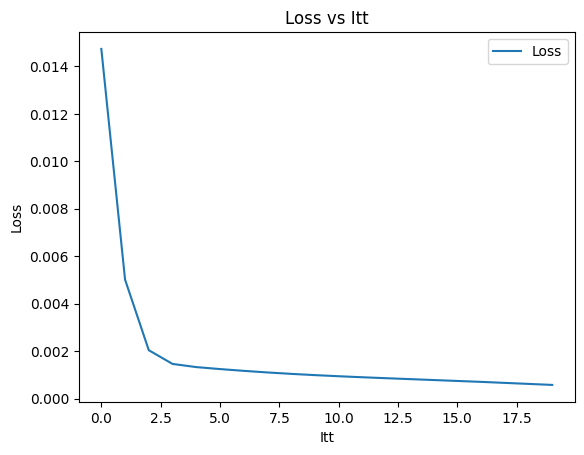

In [350]:
# loss curve



plt.plot(range(len(J_history)), J_history, label='Loss')  # Red circles for true values
plt.xlabel('Itt')
plt.ylabel('Loss')
plt.title('Loss vs Itt')
plt.legend()
plt.show()

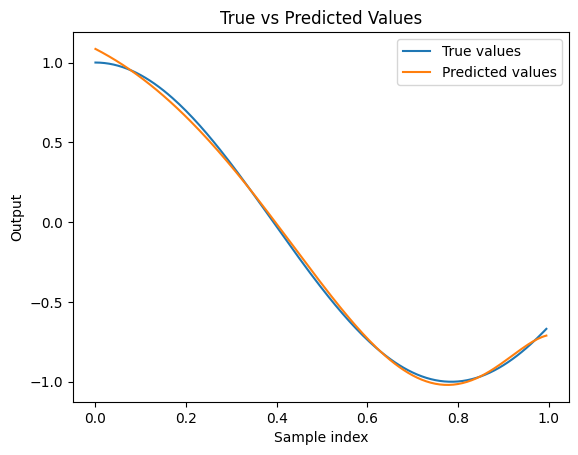

In [351]:
with torch.no_grad():
  predictions = model(X)

  plot_x = X.numpy()
  pred_y = predictions.numpy()

  plt.plot(x_in, y, label='True values')  # Red circles for true values
  plt.plot(x_in, pred_y, label='Predicted values')  # Blue stars for predictions
  plt.xlabel('Sample index')
  plt.ylabel('Output')
  plt.title('True vs Predicted Values')
  plt.legend()
  plt.show()
